<a href="https://colab.research.google.com/github/SayyidKamal/-House-Sales-in-King-County-USA/blob/main/Predictive_Maintenance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predictive Maintenance in Nigerian Industrial Settings**

**By Team Intelite:**


Team Members:
- Peter Esekhaigbe (Team Lead)
- Ahmad Sayyid Kamal
- Ayo Oladele

## **Abstract**

This study presents an in-depth investigation into predictive maintenance modeling using the Predictive Maintenance Dataset. We aim to develop machine-learning models that predict impending equipment failures based on the machine’s operational and sensor data. The dataset includes multiple sensor measurements, environmental variables, machine age / usage features, and maintenance records. We preprocess the data, perform exploratory analysis, apply dimensionality-reduction and feature-engineering methods, and then train a variety of classification algorithms. Hyperparameter tuning, cross-validation, and careful evaluation are employed to mitigate overfitting and ensure generalization. Our results demonstrate that leveraging principal-component analysis for feature reduction combined with regularized classifiers significantly improves predictive accuracy and robustness. The outcome of this work offers actionable insights to maintenance teams: when and which machines are at risk of failure, enabling timely interventions and reducing unplanned downtime.

## **Introduction**

The emergence of Industry 4.0 has revolutionized the manufacturing landscape by integrating cyber-physical systems, IoT-enabled sensors, big data analytics, and artificial intelligence into industrial operations. One of its most transformative applications is predictive maintenance, which aims to forecast equipment failures before they occur using continuous data from smart sensors and connected machines. Traditional maintenance strategies—such as reactive or preventive maintenance—often lead to either excessive downtime or unnecessary servicing. In contrast, predictive maintenance, as envisioned in Industry 4.0, leverages real-time machine data to enable self-monitoring, intelligent diagnostics, and autonomous decision-making.

While many industries grapple to rectify machine failures and equipment downtime, machine learning principles can be deployed to help predict machines prone to failures by assessing certain metrics (such as temperature, pressure, vibration etc. of motors, rotational parts of the machine. These metrics show the overall physical condition of the machines per time and consequently help these industried prevent these failure.

The Predictive Maintenance Dataset [Kaggle Preventive Maintenance Dataset](https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset/data) used in this project embodies these aforementioned principles as it contains a time-series data collected from industrial sensors that measure operational conditions such as temperature, vibration, pressure, and rotational speed. By applying advanced machine-learning and data-analytics techniques, this study seeks to develop predictive models that can identify early signs of equipment degradation. The overarching goal is to contribute to smart manufacturing environments where machines communicate, adapt, and optimize their performance autonomously—minimizing downtime, enhancing safety, maximizing productivity and help utlimately help industries make that shift from the preventive to predictive maintenance

## **Problem Statement**

Despite the availability of vast operational and sensor data, many industrial facilities continue to rely on preventive maintenance schedules or address failures only after they occur. This approach can lead to excessive maintenance costs, unexpected equipment downtime, and inefficient resource allocation. The key challenge addressed in this project is: How can we leverage historical sensor, machine usage, and maintenance data to predict equipment failures ahead of time? Specifically, using the Predictive Maintenance Dataset, we seek to build a model that can accurately classify machines at risk of imminent failure. The distinct sub-problems include:

- Cleaning and preprocessing multivariate sensor and usage data to handle missing values, outliers, and possible covariate drift.

- Reducing dimensionality and selecting the most predictive features from a high-dimensional dataset to avoid overfitting while preserving relevant failure signals.

- Training and validating machine-learning classifiers that not only achieve high accuracy but also generalize to new machines or usage conditions.

- Interpreting model predictions in a manner that maintenance engineers can trust and act upon — identifying which features or sensors drive failure risk.


By solving this problem, the project aims to create a predictive maintenance tool that supports data-driven decision making, reduces unplanned machine downtime, and optimizes maintenance scheduling in an industrial environment.


## **Dataset Details**

**Source:** [Preventive Maintenance Dataset](https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset/data).

**Features:**
- $date$: equipment failures and non-failures date
- $device$: device or equipment for which faiiure is to be predicted
- $failure$: target variable; indicates if a device failed.
- $metric1$ - $metric9$: represent different variables such as temperature, vibration, rotationa speed etc. They represent the features that determine the potential failure of any device



##**Data Processing**

### **Data Analysis**

We will implementing the in-depth analysis on the dataset, removing null values, visualising the data at different levels. Additionally, feature engineering will be performed to introduce new features that would be relevant for model developement.

Results  will also be summarised at the end each implementation

In [ ]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import zipfile
import time
from scipy.stats import randint

In [ ]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance_dataset.csv.zip to predictive_maintenance_dataset.csv.zip


In [ ]:
# load dataset from zip folder
def load_data_from_zip(zip_file_path, csv_file_name):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_file_name) as csv_file:
            df = pd.read_csv(csv_file)
    return df

In [ ]:
# Load dataset into a dataframe
csv_file_name = 'predictive_maintenance_dataset.csv'
df = load_data_from_zip('predictive_maintenance_dataset.csv.zip', csv_file_name)

In [ ]:
# Check for the first few rows of the dataset
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [ ]:
df.shape # shape of dataset

(124494, 12)

There are 124494 rows and 12 columns in the dataset

In [ ]:
# Summary statistics of the data
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


Since *metric1* has the highest values as opposed to other metrics, there'll be need for normalization to be done before model development.

But for now, we will visualise the data on histogram to observe the data patterns

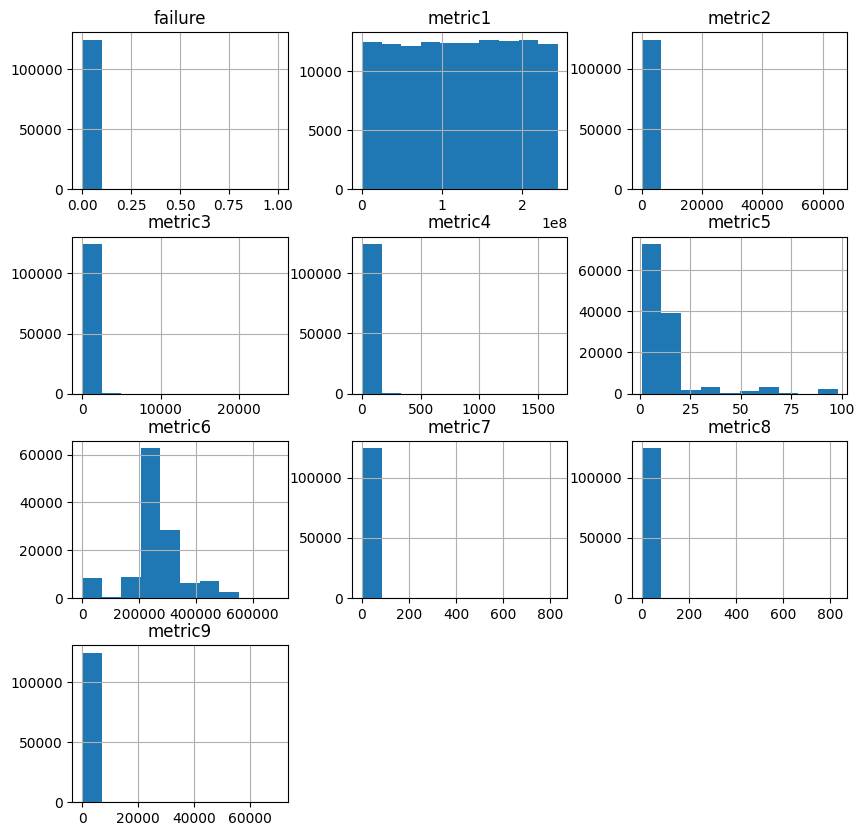

In [ ]:
# Visualise data on histogram
df.hist(figsize=(10, 10))
plt.show()

In [ ]:
df.isnull().sum() #check for null values

,0
date,0
device,0
failure,0
metric1,0
metric2,0
metric3,0
metric4,0
metric5,0
metric6,0
metric7,0


In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

There are no null and missing values. However  we proceed to drop data dupicates

In [ ]:
df.value_counts() # count data values based on date and device

date      device    failure  metric1    metric2  metric3  metric4  metric5  metric6  metric7  metric8  metric9
9/9/2015  Z1F1VMZB  0        70602112   0        0        0        5        227106   0        0        0          1
1/1/2015  S1F01085  0        215630672  55       0        52       6        407438   0        0        7          1
          S1F0166B  0        61370680   0        3        0        6        403174   0        0        0          1
          S1F01E6Y  0        173295968  0        0        0        12       237394   0        0        0          1
          S1F01JE0  0        79694024   0        0        0        6        410186   0        0        0          1
                                                                                                                 ..
          S1F0322R  0        34540712   0        0        0        9        411399   0        0        0          1
          S1F0318A  0        35018688   0        0        0        9        394890   0        0        5          1
          S1F02WFT  0        44348552   6150     14       1074     11       249515   0        0        21         1
          S1F02VAX  0        61019512   168      2        521      3        380496   0        0        3          1
          S1F02P76  0        104131304  1536     0        175      11       301679   0        0        0          1
Name: count, Length: 124493, dtype: int64

Since we interest in predicting device failure, we proceed to perform data count based on the faiilure columns (the target variable). Value 1 represent device failure, Value 0 depicts no failure of device

In [ ]:
# count failures and non-failures in the original data
failure_count = df['failure'].value_counts()
print(failure_count)

failure
0    124387
1       106
Name: count, dtype: int64


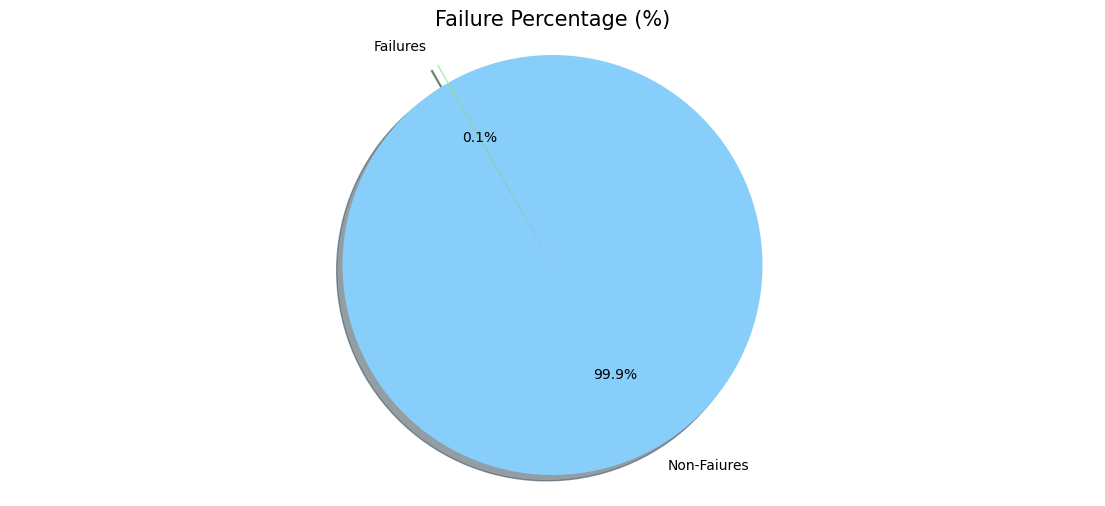

In [ ]:
# Visualise on results on a pie chart
plt.figure(figsize=(14,6))
labels = 'Non-Faiures', 'Failures'
colors = ['lightskyblue', 'lightgreen']
explode = (0.1, 0)
# Get the counts of failures (1) and non-failures (0)
failure_counts = df.groupby('failure').size()
plt.pie(x=failure_counts, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title('Failure Percentage (%)', size=15)
plt.show()

There are 99.9% of non failures in the dataset and 0.1% failures. This depicts an almost perfect maintenance equipments system. However we have make a deep dive the reason for 0.1% failure and which device are culprits

In [ ]:
# count number of unique devices in the dataset
device_count = df['device'].nunique()
print(device_count)

1169


There are 1169 unique devices in the dataset.

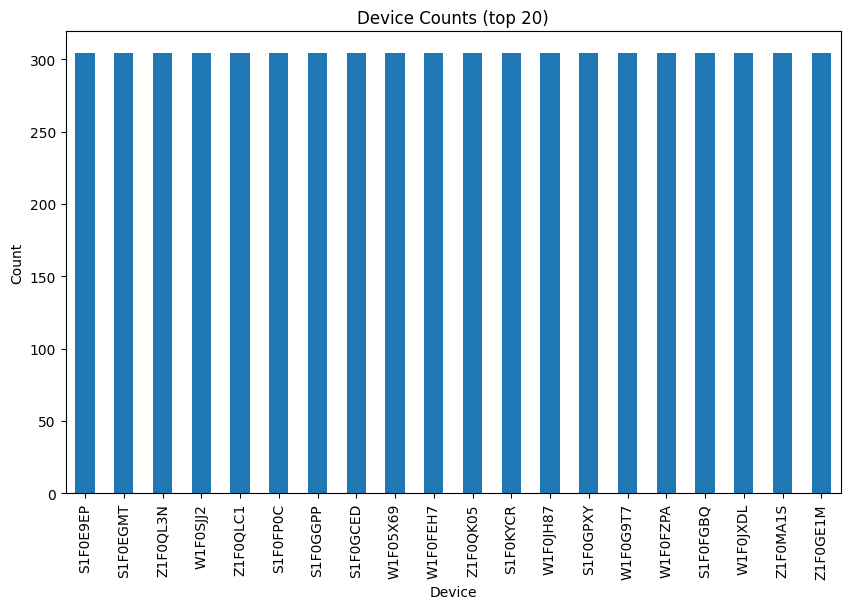

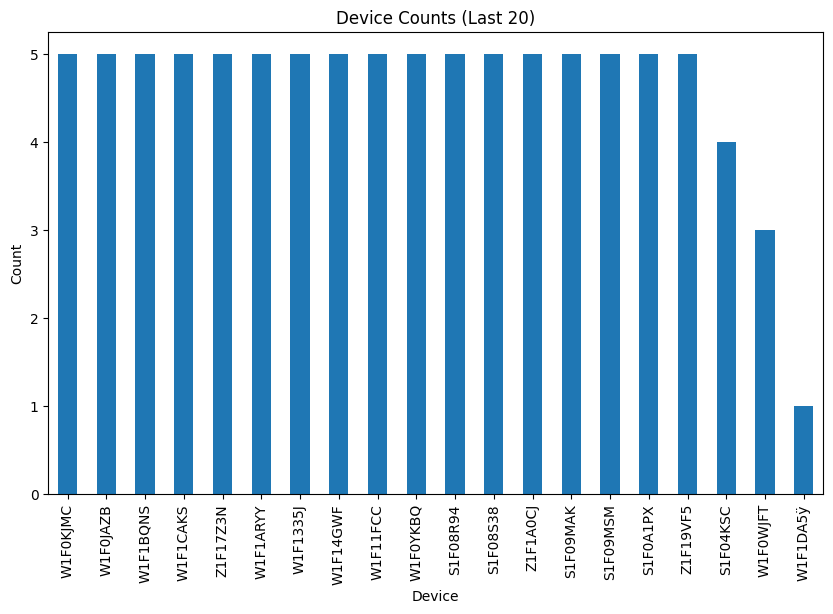

In [ ]:
# Get the value counts of the 'device' column
device_value_counts = df['device'].value_counts()

# visualise top 20 device_count on bar plot using ax.plot
fig, ax = plt.subplots(figsize=(10, 6))
device_value_counts.head(20).plot(kind='bar', ax=ax)
ax.set_xlabel('Device')
ax.set_ylabel('Count')
ax.set_title('Device Counts (top 20)')
plt.show()

# visualise last 20 device_count on bar plot using ax.plot
fig, ax = plt.subplots(figsize=(10, 6))
device_value_counts.tail(20).plot(kind='bar', ax=ax)
ax.set_xlabel('Device')
ax.set_ylabel('Count')
ax.set_title('Device Counts (Last 20)')
plt.show()

### **Feature Engineering**


In [ ]:
# Duplicate dataset for this implementation
df2 = df.copy()
df2['date'] = pd.to_datetime(df2['date'])
df2.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


**Device based feature engineering**

Perform device based feature engineering of the data. This entails:
- grouping the dataset by device
- introducing new features

In [ ]:
# Group by device
group_by_device = df2.groupby('device')



In [ ]:
# Introduce new features based on grouping
average_failure_rate = group_by_device['failure'].mean() # mean failure for each device
staticmethod_failure_rate = group_by_device['failure'].std() # standard deviation of the failure per device
max_failure_rate = group_by_device['failure'].max() # maximum number failures for each device
min_failure_rate = group_by_device['failure'].min() # minimum number failures for each device
risk_of_failure_by_device = average_failure_rate + staticmethod_failure_rate # mean failure + std deviation from the mean



In [ ]:
# Create dataframe for new device features
device_features = pd.DataFrame({
    'average_failure_rate': average_failure_rate,
    'staticmethod_failure_rate': staticmethod_failure_rate,
    'max_failure_rate': max_failure_rate,
    'min_failure_rate': min_failure_rate,
    'risk_of_failure_by_device': risk_of_failure_by_device
})

Here is a description of the features in the `device_features` DataFrame:

- `average_failure_rate`: The mean failure rate for each device.
- `staticmethod_failure_rate`: The standard deviation of the failure rate for each device.
- `max_failure_rate`: The maximum failure value (1 if the device failed at least once, 0 otherwise) for each device.
- `min_failure_rate`: The minimum failure value (always 0 as long as the device did not fail every single day it was recorded) for each device.
- `risk_of_failure_by_device`: The sum of the average failure rate and the standard deviation of the failure rate for each device. This metric attempts to capture both the average propensity for failure and the variability in failure occurrences.






In [ ]:
device_features.head()

,average_failure_rate,staticmethod_failure_rate,max_failure_rate,min_failure_rate,risk_of_failure_by_device
device,,,,,
S1F01085,0.0,0.0,0,0,0.0
S1F013BB,0.0,0.0,0,0,0.0
S1F0166B,0.0,0.0,0,0,0.0
S1F01E6Y,0.0,0.0,0,0,0.0
S1F01JE0,0.0,0.0,0,0,0.0


In [ ]:
#device_features.tail()

In [ ]:
device_features.describe() #summary stats

,average_failure_rate,staticmethod_failure_rate,max_failure_rate,min_failure_rate,risk_of_failure_by_device
count,1169.000000,1168.000000,1169.000000,1169.0,1168.000000
mean,0.002413,0.012768,0.090676,0.0,0.015183
std,0.012860,0.047481,0.287270,0.0,0.059464
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000
max,0.200000,0.447214,1.000000,0.0,0.647214


In [ ]:
device_features.shape #shape

(1169, 5)

There are 1169 rows representing each device and 5 columns represents the new features.

We proceed to drop irrelevant features in `device_features`

In [ ]:
device_features = device_features.drop(columns=['min_failure_rate', 'max_failure_rate'])
device_features.head()

,average_failure_rate,staticmethod_failure_rate,risk_of_failure_by_device
device,,,
S1F01085,0.0,0.0,0.0
S1F013BB,0.0,0.0,0.0
S1F0166B,0.0,0.0,0.0
S1F01E6Y,0.0,0.0,0.0
S1F01JE0,0.0,0.0,0.0


**Risk of Failure: Histogram Plot**

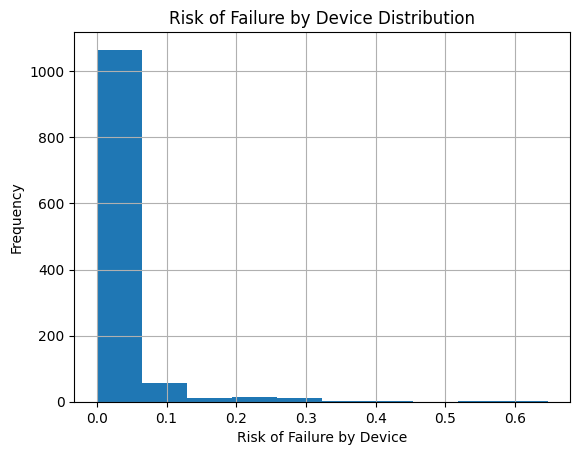

In [ ]:
risk_of_failure_by_device.hist()
plt.xlabel('Risk of Failure by Device')
plt.ylabel('Frequency')
plt.title('Risk of Failure by Device Distribution')
plt.show()

This indicates that a large number (>1000) of devices have a calculated risk of failure close to zero, meaning they have not experienced failures or have very low variability in their failure history. The distribution is heavily skewed towards zero, which aligns with our earlier observation that only a small percentage (0.1%) of the data points represent failures. This visual confirms that most devices in the dataset are **highly reliable** with a low calculated risk of failure based on this metric.

**Risk of Failure: Bar Plot**

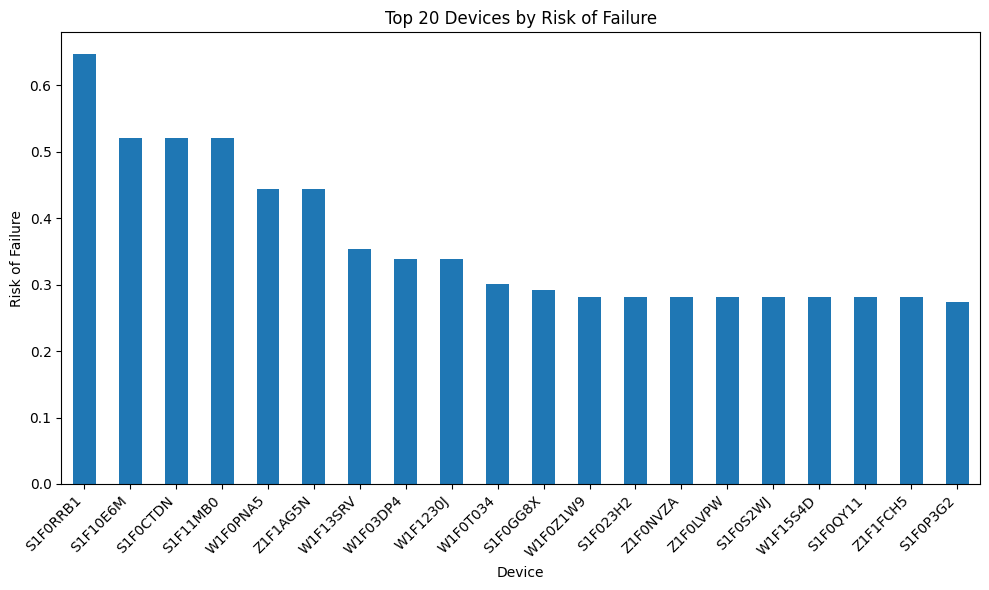

In [ ]:
# Sort devices by risk of failure and select the top 20
top_20_risk_devices = risk_of_failure_by_device.sort_values(ascending=False).head(20)

# Bar plot top 20 devices
plt.figure(figsize=(10, 6))
top_20_risk_devices.plot(kind='bar')
plt.xlabel('Device')
plt.ylabel('Risk of Failure')
plt.title('Top 20 Devices by Risk of Failure')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

This visualization complements the histogram by pinpointing the individual devices that contribute to the tail of the distribution (the devices with non-zero risk of failure).

- The device `S1FORRB1` is more prone to failure than any other device as it has the highest risk of failure

**Date-based Feature engineering**

Perform date based feature engineering of the data. This entails:
- grouping the dataset by failure dates
- introducing new features

In [ ]:
group_by_date = df2.groupby('date') #date grouping
average_failure_days = group_by_date['failure'].mean() # mean failure by date
staticmethod_failure_days = group_by_date['failure'].std() # standard deviation of failures by date
risk_failure_by_date = average_failure_days + staticmethod_failure_days # average failure + standard deviation from mean failure

In [ ]:
group_by_date.head()


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124463,2015-11-02,S1F0E9EP,0,205465736,0,0,12,11,353337,0,0,0
124464,2015-11-02,S1F0EGMT,0,159867281,0,0,13,11,347165,32,32,0
124465,2015-11-02,S1F0FGBQ,0,198816136,0,0,0,12,309988,0,0,0
124466,2015-11-02,S1F0FP0C,0,179176160,0,0,0,12,356892,0,0,0


In [ ]:
# frame new features
date_features = pd.DataFrame({
    'average_failure_days': average_failure_days,
    'staticmethod_failure_days': staticmethod_failure_days,
    'risk_failure_by_date': risk_failure_by_date
})

In [ ]:
# Combine df, device_features and date_features on device and date respectively
df['date'] = pd.to_datetime(df['date'])
df = pd.merge(df, device_features, on='device')

# Reset the index of date_features to make 'date' a column
date_features_reset = date_features.reset_index()
df = pd.merge(df, date_features_reset, on='date')

In [ ]:
df.head()


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,average_failure_rate,staticmethod_failure_rate,risk_of_failure_by_device,average_failure_days,staticmethod_failure_days,risk_failure_by_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape #shape of consolidated dataframe

(124493, 18)

In [ ]:
# identify failure dates
failure_dates_df = df[df['failure'] == 1]
failure_dates_df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,average_failure_rate,staticmethod_failure_rate,risk_of_failure_by_device,average_failure_days,staticmethod_failure_days,risk_failure_by_date
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1,0.200000,0.447214,0.647214,0.000861,0.029348,0.030210
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3,0.142857,0.377964,0.520822,0.001253,0.035400,0.036653
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0,0.111111,0.333333,0.444444,0.001323,0.036370,0.037692
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1,0.076923,0.277350,0.354273,0.001325,0.036394,0.037718
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0,0.071429,0.267261,0.338690,0.001397,0.037372,0.038768


In [ ]:
failure_dates_df.shape #failure_dates shape

(106, 18)

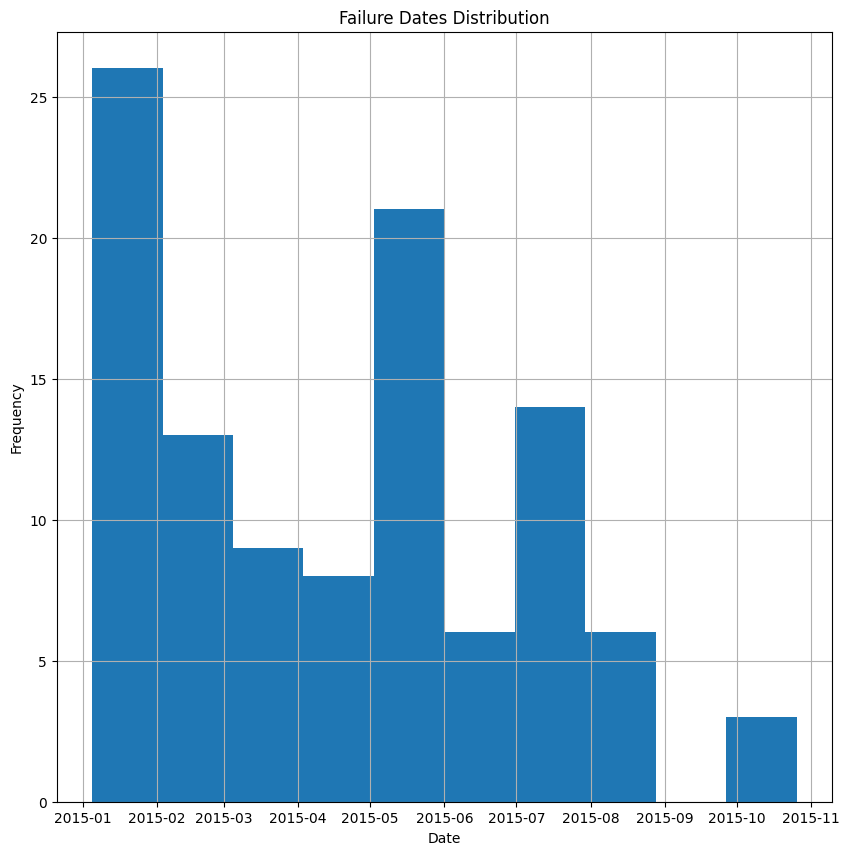

In [ ]:
# Visualize failure_dates_df
failure_dates_df['date'].hist(figsize=(10, 10))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Failure Dates Distribution')
plt.show()

In [ ]:
non_failure_dates_df = df[df['failure'] == 0]
non_failure_dates_df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,average_failure_rate,staticmethod_failure_rate,risk_of_failure_by_device,average_failure_days,staticmethod_failure_days,risk_failure_by_date
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
non_failure_dates_df.shape

(124387, 18)

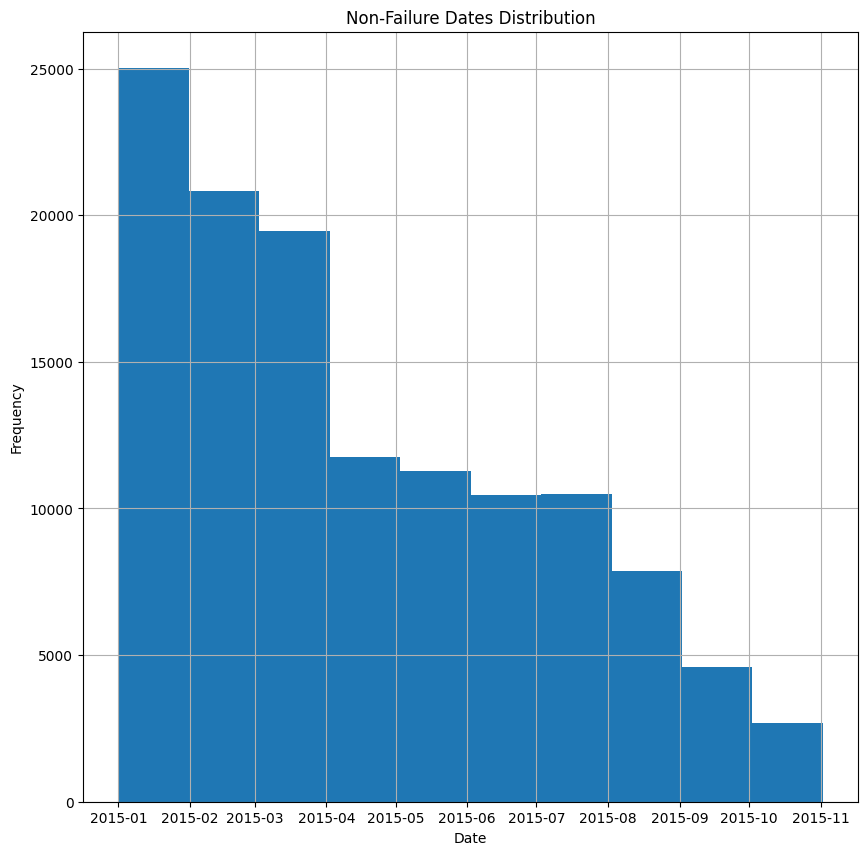

In [ ]:
# Visualize failure_dates_df
non_failure_dates_df['date'].hist(figsize=(10, 10))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Non-Failure Dates Distribution')
plt.show()

- `failure_dates_df`: contains only the rows where the failure column is equal to 1, meaning it includes date points corresponding to device failures.

- The histogram of `failure_dates_df['date']` shows the distribution of failure events over time, indicating on which dates failures occurred and how frequently. The most failures happened in the **month of January and May 2015**

- `non_failure_dates_df`: This DataFrame contains the rows where the failure column is equal to 0, representing data points where no device failure was recorded.

- The histogram of `non_failure_dates_df['date']` shows the distribution of non-failure events over time. Since the vast majority of your data points are non-failures, this histogram likely shows a more uniform distribution across the dates present in the dataset, reflecting the daily operational records of the devices without failure. The most non-failures happened in the **month of January and February 2015**


### **Data Preprocessing**


Data preprocessing entails identying the features (X) and target variable (y) need to solve the model classification problem.

- X: All other features except `df['failure]` column.
- y: `df['failure]` column

`categorical_features`: features that are non-numerical

In [ ]:
# set features and target variable
features = df.drop(['failure', "date"],axis=1)
target = df['failure']

In [ ]:
# check for categorical features
categorical_features = features.select_dtypes(include=['object']).columns
print("Categorical Features:")
for col in categorical_features:
    print(col)

Categorical Features:
device


Encode categorical features using `LabelEncoder()`for ease of model development.

In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_features:
    features[col] = label_encoder.fit_transform(features[col])

In [ ]:
features.head()

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,average_failure_rate,staticmethod_failure_rate,risk_of_failure_by_device,average_failure_days,staticmethod_failure_days,risk_failure_by_date
0,0,215630672,55,0,52,6,407438,0,0,7,0.0,0.0,0.0,0.0,0.0,0.0
1,2,61370680,0,3,0,6,403174,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,173295968,0,0,0,12,237394,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,79694024,0,0,0,6,410186,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,135970480,0,0,0,15,313173,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features.dtypes

,0
device,int64
metric1,int64
metric2,int64
metric3,int64
metric4,int64
metric5,int64
metric6,int64
metric7,int64
metric8,int64
metric9,int64


The results shows that all features are now numerical

In [ ]:
# target feature type
target.dtypes

dtype('int64')

We proceed the scale-transform the features to take care of very large and small feature values in the data

In [ ]:
# Scale transform data
preprocessor = StandardScaler()
features_scaled = preprocessor.fit_transform(features)

features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

In [ ]:

features_scaled.head()

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,average_failure_rate,staticmethod_failure_rate,risk_of_failure_by_device,average_failure_days,staticmethod_failure_days,risk_failure_by_date
0,-1.902287,1.323366,-0.047940,-0.053519,2.193895,-0.515757,1.485260,-0.039335,-0.039335,-0.021816,-0.18179,-0.279075,-0.269871,-0.49526,-0.616274,-0.611106
1,-1.896174,-0.865990,-0.073173,-0.037368,-0.076004,-0.515757,1.442255,-0.039335,-0.039335,-0.047210,-0.18179,-0.279075,-0.269871,-0.49526,-0.616274,-0.611106
2,-1.893117,0.722525,-0.073173,-0.053519,-0.076004,-0.139416,-0.229741,-0.039335,-0.039335,-0.047210,-0.18179,-0.279075,-0.269871,-0.49526,-0.616274,-0.611106
3,-1.890061,-0.605934,-0.073173,-0.053519,-0.076004,-0.515757,1.512975,-0.039335,-0.039335,-0.047210,-0.18179,-0.279075,-0.269871,-0.49526,-0.616274,-0.611106
4,-1.887005,0.192778,-0.073173,-0.053519,-0.076004,0.048754,0.534538,-0.039335,-0.039335,-0.036327,-0.18179,-0.279075,-0.269871,-0.49526,-0.616274,-0.611106


In [ ]:
# Merge transformed features with target variable
preprocessed_data = pd.concat([features_scaled, target], axis=1)
preprocessed_data.dropna(inplace=True)

In [ ]:
# Specify X and y values in the preprocessed_data frame
X, y = preprocessed_data.drop('failure', axis=1), preprocessed_data['failure']

## **Methodology: Model Development**

Since the target variable, y, only specify two categories: 0 for non-failures & 1 for failures, the conclude that we'll be dealing with **Classification Problem** here.

First proceed with data splitting (70/30). Train set: 70, test_set: 30

**Experiment**

- `train-test split`: 70% of data is used to train the `preprocessed_data`, 30% of the  `preprocessed_data`is used as the test set.
- `random_state`: seeds the random number generator and ensures that we get the same train and test sets, and model performance.
- `test_size`: sets the test size ratio.

In [ ]:
# Train-test split (70/30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Apply SMOTE**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE only on the train set
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print (Counter(y_resampled))

Counter({0: 87064, 1: 87064})


**Classification**

For the model development, we consider a number of algorithms and and categorise them based on their evaluation metrics **(model accuracy)**

In [ ]:
!pip install catboost #import catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [ ]:
# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
# Determine the best classification method to use on the train set (using simple initial parameters)
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regressiom': LogisticRegression(max_iter=500),
    'Random Classifier': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam'),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0, n_estimators=100)
}



**Models explained:**

- Linear Discriminant Analysis (LDA): A linear model that finds a linear combination of features that characterizes or separates two or more classes. It assumes that the data is normally distributed and that the classes have equal covariance matrices.

- Logistic Regression: A linear model used for binary classification. It models the probability of a binary outcome using a logistic function.
Random Forest Classifier: An ensemble method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It helps to reduce overfitting compared to a single decision tree.

- Support Vector Machine (SVC): A powerful model that finds the optimal hyperplane to separate data points into different classes. It can use different kernel functions to handle non-linearly separable data.


- K-Nearest Neighbors (KNN): A simple, non-parametric algorithm that classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space.
Decision Tree Classifier: A tree-like model where each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label.

- MLP Classifier: A Multilayer Perceptron (MLP) is a type of artificial neural network. The MLPClassifier is used for classification tasks and consists of multiple layers of nodes (neurons) with non-linear activation functions.

- Naive Bayes: A probabilistic classifier based on applying Bayes' theorem with the "naive" assumption of conditional independence between features.

- XGBoost: Extreme Gradient Boosting is a powerful and popular gradient boosting algorithm known for its speed and performance. It's an ensemble method that builds trees sequentially, with each new tree trying to correct the errors of the previous ones.

- CatBoost: Another gradient boosting library that is particularly effective with categorical features. It uses a novel approach to handle categorical variables and has built-in regularization.

**Model Performance on Train Set**

Evaluate the performance of each model on the train set.


In [ ]:
model_results_train_class = []
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred_train = model.predict(X_resampled)
    accuracy = accuracy_score(y_resampled, y_pred_train)
    model_train_report = classification_report(y_resampled, y_pred_train)

    model_results_train_class.append({"Model": name, "Accuracy": accuracy, "Report":model_train_report}) #evaluate model performance on train set
# frame results
model_results_train_class_df = pd.DataFrame(model_results_train_class).sort_values(by='Accuracy', ascending=False)


In [ ]:
model_results_train_class_df


,Model,Accuracy,Report
5,Decision Tree Classifier,1.000000,precision recall f1-score ...
2,Random Classifier,1.000000,precision recall f1-score ...
8,XGBoost,1.000000,precision recall f1-score ...
6,MLP Classifier,0.999673,precision recall f1-score ...
9,CatBoost,0.999213,precision recall f1-score ...
4,K-Nearest Neighbors,0.998943,precision recall f1-score ...
3,Support Vector Machine,0.991483,precision recall f1-score ...
1,Logistic Regressiom,0.991121,precision recall f1-score ...
0,Linear Discriminant Analysis,0.975334,precision recall f1-score ...
7,Naive Bayes,0.946304,precision recall f1-score ...


In [ ]:
model_train_report = classification_report(y_resampled, y_pred_train)

model_train_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     87064\n           1       1.00      1.00      1.00     87064\n\n    accuracy                           1.00    174128\n   macro avg       1.00      1.00      1.00    174128\nweighted avg       1.00      1.00      1.00    174128\n'

**Model Performance on Test Set**

Evaluate the performance of each model on the test set.

In [ ]:
model_results_test_class = []
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)

    model_results_test_class.append({"Model": name, "Accuracy": accuracy}) #evaluate model performance on test set

# frame results
model_results_test_class_df = pd.DataFrame(model_results_test_class).sort_values(by='Accuracy', ascending=False)

In [ ]:
model_results_test_class_df

,Model,Accuracy
2,Random Classifier,0.999063
8,XGBoost,0.999009
5,Decision Tree Classifier,0.998688
6,MLP Classifier,0.998019
9,CatBoost,0.997456
4,K-Nearest Neighbors,0.997055
3,Support Vector Machine,0.982864
1,Logistic Regressiom,0.982194
7,Naive Bayes,0.967816
0,Linear Discriminant Analysis,0.949556


In [ ]:
# classification report for the test set
classification_report(y_test, y_pred_test)

Summary:
- The true performance of a model is measured based on the test set.
- While models such as DecisionTreeClassifier, XGBoost and CatBoost fit well on the train data, they do not generalise so well on the test data.
- **KNearest Neigbours, Logistic Regression, & MLP Classifiers** performed better than other models

- There is an ***overfitting*** problem on the data, therefore we'll implement hyperparameter tuning on each of the best performing (3) models so as determine the best paramters, and optimize the model performance (resolve the overfitting problem)


### Model Regularization


#### A. **Hyperparameter Tuning**

**Cross Validation**

Cross validation estimates how the model generalises on unseen data. It is does that by splitting dataset into folds (e.g cv=5 indicates 5 folds) during hyperparameter tuning

There are two main cross validation technoques used during: `GridSearchCV` and `RandomisedSearchCV`.
- `GridSearchCV`: Though exhaustive in looping through the parameter grid, it computationally expensive and time-wasting.
- `RandomisedSearchCV`: Performs a random search at a faster rate but might not guarante the best hyperparameter combination.

For the following hyperparameter tuning implementation, we'll be using `RandomisedSearchCV`.to avoid computational cost and save time.






 ##### **K-Nearest Neighbour Classifier**

In [ ]:
# hyperparameter tuning of KNN
KNN_params = {
    'n_neighbors': [2,5, 10, 15, 20], #n_neighbours
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'] #distance-metric
}

start_time = time.time() # execution start time
# Using RandomSearchCV
random_search = RandomizedSearchCV(KNeighborsClassifier(), KNN_params, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

end_time = time.time() # execution end time
execution_time = end_time - start_time # measure execution time

print(" RandomizedSearchCV Execution Time:", execution_time, "seconds")

# Fit best model
best_model.fit(X_train, y_train)

# Prediction
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

The `accuracy` score for the KNN Classifier reduced from 99.9357% (using hypotethical initial parameters) to 99.933% (using tuned parameters). This clearly reduce the overfitting of the KNN model on the test data.

##### **Logistic Regression: Cross Validation + Regularization**

In [ ]:
log_params  = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], #penalty function
    'C': [ 0.1, 1, 10, 100], #resularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], # solver types depending on the penalty
    'max_iter': [100, 200, 500, 1000]
}

start_time = time.time() # execution start time
random_search = RandomizedSearchCV(LogisticRegression(), log_params, cv=5, scoring='accuracy')

#Fit model
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_

end_time = time.time() # execution end time
execution_time = end_time - start_time # measure execution time

# Prediction
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

- The model accuracy reduced from the initial 99.938% in the intial model to 99.935% with best paramters. We were abe to reduce overfitting.
- The best penalty function `L2-Regularizer` **(Ridge Regression**.Therefore we introduce the ***RidgeClassifier*** algorithm to further reduce overfitting.

**RidgeClassifier + Cross Validation (RidgeClassifierCV)**

In [ ]:
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
# Define the model
ridge_cv = RidgeClassifierCV(alphas=[0.1, 1.0, 10.0], cv=5) # cross validation to select the best alpha
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
print("Best Alpha:", best_alpha)

ridge_cv = RidgeClassifier(alpha=best_alpha)
ridge_cv.fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

RidgeClassifier algorithm further reduces overfitting from 99.935% to 99.933%

##### **Muiti-Layer Perceptron Classifier**

In [ ]:
# Define the hyperparameter grid for MLPClassifier
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'softmax'],
    'alpha' : [0.01, 0.1],
    'max_iter': [200, 500]
}

start_time = time.time() # execution start time

# Using RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(MLPClassifier(), mlp_params, cv=3, scoring='accuracy', n_iter=5) # Reduced n_iter and cv
random_search_mlp.fit(X_train, y_train)

end_time = time.time() # execution end time
execution_time = end_time - start_time # measure execution time

print("RandomizedSearchCV Execution Time:", execution_time, "seconds")

best_params_mlp = random_search_mlp.best_params_
best_model_mlp = random_search_mlp.best_estimator_

# Fit the best model
best_model_mlp.fit(X_train, y_train)

# Prediction
y_pred_mlp = best_model_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Best Parameters for MLPClassifier:", best_params_mlp)
print("Accuracy with best MLPClassifier:", accuracy_mlp)

MLPClassifier and Logistic Regression attained the same model accuracy.

####**B. Principal Component Analysis (Selecting the Relevant Features)**

To further reduce overfitting, we want apply some sort of unsperviised learning on X features before applying a supervised learninf model. This unsupervised learning model is Principal Component Analysis

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to simplify large datasets by transforming them into a smaller set of uncorrelated variables called principal components, while retaining as much information (variance) as possible.

The goal here is to fit in only relevant features (indicated by PCA) into the various classification algorithms to further reduce overfitting and improve model performance.



In [ ]:
#load pca library
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) # keep 95% of the variance.
X_pca = pca.fit_transform(X)

# Explained & Cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_varaince = np.cumsum(explained_variance)

print(f" Optimal number of components selected: {pca.n_components_}")

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(explained_variance, marker='o', linestyle='-')
plt.title('Explained Variance')


plt.figure(figsize=(10, 6))
plt.plot(cumulative_varaince, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.title('Scree Plot')

- The PCA analysis show that there are 11 important features based of their explained variance and eigendecoposition.
- Let's proceed to unpack all 11 components and fit **tuned** models onto the `optimal_components`

In [ ]:
optimal_components = pca.n_components_

pca_opt = PCA(n_components=optimal_components)
X_pca_opt = pca_opt.fit_transform(X) # transform scaled features using optimal compoents

print(f"Transformed data shape: {X_pca_opt.shape}")

In [ ]:
# Data splitting (70/30 ratio)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_pca_opt, y , test_size=0.3, random_state=42)

In [ ]:
# Determine the best classification method to use on the train set from the tuned models
models_new = {

    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l2', max_iter=500),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2, metric='euclidean', weights='uniform'),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam')

}

Model Performance on New Train set `X_test_new`

In [ ]:
model_results_test_class_new = []
for name, model in models_new.items():
    model.fit(X_train_new, y_train_new)
    y_pred_test_new = model.predict(X_test_new)
    accuracy = accuracy_score(y_test_new, y_pred_test_new)

    model_results_test_class_new.append({"Model": name, "Accuracy": accuracy}) #evaluate model performance on test set

#frame results
model_results_test_class_new_df = pd.DataFrame(model_results_test_class_new).sort_values(by='Accuracy', ascending=False)

model_results_test_class_new_df


- MLP Classifier performed better than Logistic and KNNClassifiers after performing PCA Analysis
- MLP Classifier optimally reduces overfitting on the test data: Accuracy score after PCA analysis - 99.941%

In [ ]:
# Plot MLP Training vs Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(best_model_mlp.loss_curve_, marker='o', linestyle='-')
plt.title('MLP Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# **Results Summary**

The project began by loading the predictive maintenance dataset, which contains operational and sensor data for various devices, along with a target variable indicating equipment failure. The dataset consists of 124,494 rows and 12 columns.

**Initial analysis revealed:**
- No missing values were present in the dataset.
- There were 124,493 unique rows after dropping duplicates.
- The target variable (`failure`) is highly imbalanced, with only 106 instances of failure (0.1%) compared to 124,387 instances of non-failure (99.9%).
- There are 1169 unique devices in the dataset.
- Visualizations of device counts showed a skewed distribution, with some devices having significantly more data points than others.
- Histograms of the metric features indicated varying scales, suggesting the need for feature scaling.
- Analysis of failure dates showed that most failures occurred in January and May 2015, while non-failures were more uniformly distributed, with peaks in January and February 2015.

**Preprocessing and Feature Engineering:**

The data preprocessing phase involved preparing the data for model development. The failure column was identified as the target variable (y), and all other relevant columns were considered features (X).

Key preprocessing steps included:

- Handling categorical features: The 'device' column, which was initially of object type, was encoded into a numerical format using LabelEncoder.
- Feature Scaling: Recognizing the varying scales of the numerical features, StandardScaler was applied to standardize the features, ensuring that no single feature dominates the model training due to its magnitude.
- Feature Engineering: New features were created based on grouping the data by 'device' and 'date' to capture potential trends and risks:
- Device-based features: average_failure_rate, staticmethod_failure_rate, and risk_of_failure_by_device were engineered to represent the historical failure patterns and risk associated with each device. Irrelevant features like min_failure_rate and max_failure_rate were dropped.
- Date-based features: average_failure_days, staticmethod_failure_days, and risk_failure_by_date were created to capture the overall failure trends on specific dates.The engineered features were merged back into the main DataFrame.

- The preprocessed data, including the new features, was then split into training and testing sets using a 70/30 ratio with a random_state for reproducibility.

**Model Evaluation (Before Tuning and PCA)**

Before applying hyperparameter tuning or dimensionality reduction, several classification algorithms were evaluated on the initial train-test split of the scaled features. The models included Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree Classifier, Random Forest Classifier, Linear Discriminant Analysis, Naive Bayes, MLP Classifier, XGBoost, and CatBoost.

Summary:
- Models like Decision Tree Classifier, Random Forest Classifier, and XGBoost showed perfect or near-perfect accuracy on the training set, indicating potential overfitting.
- On the test set, Logistic Regression, K-Nearest Neighbors, and MLP Classifier performed slightly better than the other models initially.
- The observed difference in performance between the train and test sets for some models highlighted an overfitting problem, necessitating regularization techniques like hyperparameter tuning and dimensionality reduction.

**After Applying PCA**

Based on model deployment and analysis of the test data after applying PCA  here are the key findings:

- The MLP Classifier achieved the highest accuracy on the test data at 99.941%.

- The K-Nearest Neighbors model had an accuracy of 99.933%

- The Logistic Regression model had an accuracy of 99.927%

- These results indicate that all three models performed very well on the test data, with the MLP Classifier showing a slight edge in accuracy. The application of PCA seems to have helped in achieving high accuracy on the unseen test data with a reduced number of features.

##**Challenges & Lessons Learned**














This project presented several challenges and provided valuable lessons:

*   **Data Imbalance:** The most significant challenge was the severe class imbalance, with failures representing only 0.1% of the dataset. This made it difficult for models to learn the patterns associated with the rare failure events. Techniques like appropriate evaluation metrics (beyond simple accuracy) and potentially resampling methods would be crucial in a real-world application.
*   **Overfitting:** Several models initially showed perfect or near-perfect accuracy on the training data but performed slightly worse on the test data, indicating overfitting. This highlighted the importance of using techniques like cross-validation and regularization (hyperparameter tuning and PCA) to improve model generalization.
*   **Hyperparameter Tuning Complexity:** Tuning hyperparameters for complex models like MLP Classifier can be time-consuming. Using `RandomizedSearchCV` instead of `GridSearchCV` and simplifying the parameter grid, as you did, was a practical lesson in balancing performance optimization with computational efficiency.
*   **Feature Engineering and Selection:** The process of creating new features based on device and date history, and then using PCA to select the most informative components, demonstrated the impact of thoughtful feature engineering and dimensionality reduction on model performance. The PCA analysis helped in identifying a smaller, more relevant set of features that still retained most of the data's variance.
*   **Importance of Test Set Evaluation:** Consistently evaluating models on a separate test set was critical to get an unbiased estimate of their performance on unseen data and identify overfitting.

Overall, the project reinforced the importance of thorough data understanding, appropriate preprocessing for imbalanced data, rigorous model evaluation, and the application of regularization techniques to build robust and generalizable predictive maintenance models.

## **Future Work**


Based on the findings and challenges encountered in this project, here are some potential areas for future work:

*   **Address Class Imbalance:** Implement techniques specifically designed for imbalanced datasets, such as:
    *   **Resampling Methods:** Oversampling the minority class (failures) using techniques like SMOTE or undersampling the majority class (non-failures).
    *   **Different Evaluation Metrics:** Focus on metrics beyond accuracy that are more suitable for imbalanced data, such as Precision, Recall, F1-score, and Area Under the ROC Curve (AUC).
    *   **Cost-Sensitive Learning:** Incorporate misclassification costs into the model training, assigning a higher penalty for misclassifying a failure.
*   **Explore Other Models:** Investigate other classification algorithms that might be particularly well-suited for imbalanced data or time-series aspects of the data, such as:
    *   **Anomaly Detection Algorithms:** Given the rarity of failures, consider framing the problem as anomaly detection rather than a standard classification task.
*   **Time-Series Analysis:** Explicitly incorporate the time-series nature of the data more deeply. This could involve:
    *   Using time-series cross-validation.
    *   Engineering features that capture temporal dependencies (e.g., rolling averages, time since last maintenance, trends in metrics over time).
    *   Exploring time-series specific deep learning models like LSTMs or GRUs if the data frequency and patterns support it.
*   **Feature Importance and Interpretability:** Delve deeper into understanding which features are most predictive of failure for the best-performing models. This can provide actionable insights for maintenance teams. Techniques like SHAP or LIME could be used.
*   **Real-world Constraints:** Consider real-world operational constraints when evaluating models, such as the cost of false positives (unnecessary maintenance) versus false negatives (unexpected failure).
*   **Data Collection:** Collect more detailed or frequent data, especially around failure events, to provide more information for the models.